## Libreria necesarias

In [1]:
import pandas as pd
import numpy as np
import keras_metrics
import tensorflow as tf
import shutil, os, sys
import matplotlib.pyplot as plt

import cv2 as cv

import tensorflow_datasets as tfds

from keras.preprocessing.image import load_img, DirectoryIterator



from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras import optimizers, layers
from tensorflow.keras import utils as k
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory 
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input




In [2]:

#Declaro la ruta de donde obtengo las imagenes y las dimensiones de estas
rutaEntreno='fruits-360\Training'
dimensiones=[100,100]

#obtenemos las imágenes de entrenamiento y validación
imagenes_train= image_dataset_from_directory(rutaEntreno, labels='inferred', label_mode='categorical', color_mode='rgb', batch_size=1000, image_size=(dimensiones[0],dimensiones[1]), validation_split=0.3,subset="training",seed=1234)

imagenes_val= image_dataset_from_directory(rutaEntreno, labels='inferred', label_mode='categorical', color_mode='rgb', batch_size=1000, image_size=(dimensiones[0],dimensiones[1]), validation_split=0.3,subset="validation",seed=1234)

#obtenemos el nombre de los labels
clases= imagenes_train.class_names

#Transformamos el dataset en tensores
image_batch, label_batch = next(iter(imagenes_train))
image_batchV, label_batchV = next(iter(imagenes_val))


Found 67692 files belonging to 131 classes.
Using 47385 files for training.
Found 67692 files belonging to 131 classes.
Using 20307 files for validation.


In [3]:
#x_t=[]
#y_t=[]
#for batch, labels in imagenes_train:
#    x_t.append(batch.numpy())
#    y_t.append(labels.numpy())
#x_train=np.array(x_t)
#y_train=np.array(y_t)    
#
#print('cambio')
#
#x_v=[]
#y_v=[]
#for batch, labels in imagenes_val:
#    x_v.append(batch.numpy())
#    y_v.append(labels.numpy())
#
#x_val=np.array(x_v)
#y_val=np.array(y_v)

In [5]:
#inception= InceptionV3(weights='imagenet', include_top=False)

In [6]:



## add a global spatial average pooling layer
#x = inception.output
#x = GlobalAveragePooling2D()(x)
#x=layers.Flatten()(x)
## let's add a fully-connected layer
#x = Dense(500, activation='relu')(x)
#x= layers.Dropout(0.5)(x)
## and a logistic layer -- let's say we have 200 classes
#predictions = Dense(len(clases), activation='softmax')(x)
#
#model= Model(inputs=inception.input,outputs=predictions)



In [7]:


#x_entreno=preprocess_input(image_batch)
#y_entreno=preprocess_input(label_batch)
#
#x_validacion=preprocess_input(image_batchV)
#y_validacion=preprocess_input(label_batchV)
#
#
##Congelo las capas de convolucion de InceptionV3
#for layer in inception.layers:
#    layer.trainable = False
#
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
#model.fit(x=x_entreno, y=y_entreno,validation_data=(x_validacion,y_validacion), epochs= 50,shuffle=True, use_multiprocessing=True)

In [8]:
#for i, layer in enumerate(inception.layers):
#   print(i, layer.name)

In [9]:
#for layer in model.layers[:200]:
#   layer.trainable = False
#for layer in model.layers[200:]:
#   layer.trainable = True
#
#from tensorflow.keras.optimizers import SGD
#model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy'])
#model.fit(x=x_entreno, y=y_entreno,validation_data=(x_validacion,y_validacion), epochs= 100,shuffle=True, use_multiprocessing=True, steps_per_epoch=100)

In [10]:


Transformaciones = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(dimensiones[0],dimensiones[1],3)),
    layers.experimental.preprocessing.RandomFlip("vertical", input_shape=(dimensiones[0],dimensiones[1],3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(dimensiones[0],dimensiones[1],3))
  ]
)

#Normalizar= layers.experimental.preprocessing.Rescaling(1./255, input_shape=(dimensiones[0],dimensiones[1],1))
pool= 3#CON UN POOL MÁS GRANDE SE REDUCEN LOS PESOS
pd= layers.ZeroPadding2D(padding=2) #PADDING
model2= Sequential([
    Transformaciones,
    #BatchNormalization(),
    #Normalizar,
    pd,
    layers.Conv2D(filters=16,kernel_size=5,padding='same',activation='relu', strides=1),
    #layers.Conv2D(filters=16,kernel_size=5,padding='same',activation='relu', strides=1),
    #layers.Conv2D(filters=16,kernel_size=5,padding='same',activation='relu', strides=1),
    layers.MaxPooling2D(pool_size=pool),
    BatchNormalization(),
    layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu', strides=1),
    #layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu', strides=1),
    #layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu', strides=1),
    layers.MaxPooling2D(pool_size=pool),
    BatchNormalization(),
    #layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu', strides=1),
    #layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu', strides=1),
    layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu', strides=1),
    BatchNormalization(),
    layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu', strides=1),
    layers.MaxPooling2D(pool_size=pool),
    BatchNormalization(),

    #layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu', strides=1),
    #layers.MaxPooling2D(pool_size=pool),

    layers.Flatten(),
    Dense(500,'relu'),
    layers.Dropout(0.5),
    Dense(len(clases),'softmax')

])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 100, 100, 3)       0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 104, 104, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 104, 104, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 34, 34, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 34, 34, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)       

In [11]:
opti= optimizers.RMSprop(learning_rate=0.0025, momentum=0.5)#learning_rate=0.05,epsilon=0.8
vueltas=5
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

model2.compile(optimizer=opti, loss='categorical_crossentropy', metrics=['accuracy'])
historico=model2.fit(x=image_batch, y=label_batch,validation_data=(image_batchV,label_batchV), epochs= 200,shuffle=True)

s: 0.8434 - accuracy: 0.7469 - val_loss: 1.1515 - val_accuracy: 0.7310
Epoch 64/200
32/32 [==============================] - 10s 318ms/step - loss: 0.8036 - accuracy: 0.7515 - val_loss: 1.0001 - val_accuracy: 0.7630
Epoch 65/200
32/32 [==============================] - 10s 330ms/step - loss: 0.6828 - accuracy: 0.7857 - val_loss: 0.8467 - val_accuracy: 0.8010
Epoch 66/200
32/32 [==============================] - 10s 321ms/step - loss: 0.7728 - accuracy: 0.7647 - val_loss: 1.3357 - val_accuracy: 0.6950
Epoch 67/200
32/32 [==============================] - 10s 325ms/step - loss: 0.8062 - accuracy: 0.7532 - val_loss: 2.2175 - val_accuracy: 0.5570
Epoch 68/200
32/32 [==============================] - 11s 331ms/step - loss: 0.8946 - accuracy: 0.7329 - val_loss: 1.2873 - val_accuracy: 0.7050
Epoch 69/200
32/32 [==============================] - 10s 313ms/step - loss: 0.6867 - accuracy: 0.7815 - val_loss: 1.2315 - val_accuracy: 0.7380
Epoch 70/200
32/32 [==============================] - 12s 3

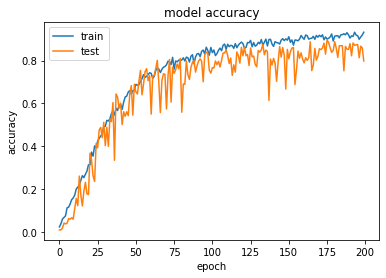

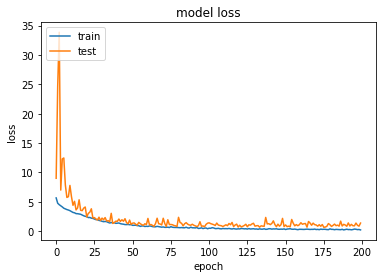

In [12]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
#from PIL import Image
rutaTest='fruits-360/Test'
rutaMulti='fruits-360/test-multiple_fruits'

imagenes_test= image_dataset_from_directory(rutaTest, labels='inferred', label_mode='categorical', color_mode='rgb',shuffle=False,batch_size=32, image_size=(dimensiones[0],dimensiones[1]))
test_multi=image_dataset_from_directory(rutaMulti, labels='inferred', label_mode='categorical', color_mode='rgb',shuffle=False,batch_size=32, image_size=(dimensiones[0],dimensiones[1]))

#image_test, label_test = next(iter(imagenes_test))

Found 22688 files belonging to 131 classes.
Found 103 files belonging to 1 classes.


In [14]:
#h=imagenes_test.as_numpy_iterator()
#salidas=[]
#lista=[]
#for image in h:
#    for i in range(len(image[0])):
#        lista.append(image[0][i])
#        salidas.append(image[1][i])
        

In [15]:

model2.evaluate(imagenes_test)

709/709 [==============================] - 58s 82ms/step - loss: 1.8334 - accuracy: 0.7269


[1.833407998085022, 0.726859986782074]

In [16]:

predicciones=model2.predict(imagenes_test)
predicciones2=model2.predict(test_multi)
#for i in range(len(predicciones)):
#    a=np.argmax(predicciones[i])
#    print("imagen: ", i, 'pertenece a: ', clases[a])


In [17]:
for images, labels in imagenes_test.take(1):
    p=model2.predict(images)
    for i in range(len(images)-1):
        cv.imshow('img',images[i].numpy().astype("uint8"))
        cv.waitKey(0)

In [18]:
j=0
for p in predicciones:
    
    mayores=sorted(p)
    numeros=[]
    for i in range(3):
        numeros.append(np.where(p==mayores[i]))
    print('Puede pertenecer a: ',clases[numeros[0][0][0]],',',clases[numeros[1][0][0]],',',clases[numeros[2][0][0]])
    if j == 200:
        break
    j+=1 





Puede pertenecer a:  Potato White , Nut Forest , Nectarine Flat
Puede pertenecer a:  Potato White , Nut Forest , Nectarine Flat
Puede pertenecer a:  Potato White , Nut Forest , Nectarine Flat
Puede pertenecer a:  Potato White , Nut Forest , Nectarine Flat
Puede pertenecer a:  Potato White , Nut Forest , Nectarine Flat
Puede pertenecer a:  Potato White , Nut Forest , Nectarine Flat
Puede pertenecer a:  Potato White , Nut Forest , Nectarine Flat
Puede pertenecer a:  Nut Forest , Nectarine Flat , Potato White
Puede pertenecer a:  Nut Forest , Nectarine Flat , Potato White
Puede pertenecer a:  Nut Forest , Nectarine Flat , Potato White
Puede pertenecer a:  Nut Forest , Nectarine Flat , Potato White
Puede pertenecer a:  Nut Forest , Nectarine Flat , Potato White
Puede pertenecer a:  Nut Forest , Nectarine Flat , Mandarine
Puede pertenecer a:  Nut Forest , Nectarine Flat , Mandarine
Puede pertenecer a:  Nut Forest , Nectarine Flat , Mandarine
Puede pertenecer a:  Potato White , Nectarine Fla